# 3.6.2 Simple Linear Regression

In [175]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.describe()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [169]:
import statsmodels.api as sm

Y = np.array(boston.target) # MEDV
X = np.array(bos.LSTAT)
X_train = sm.add_constant(X) # Our model needs an intercept so we add a column of 1s (statsmodel)

model = sm.OLS(Y, X_train)
results = model.fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           5.08e-88
Time:                        14:32:32   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
x1            -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

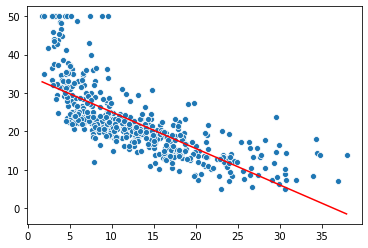

In [170]:
import seaborn as sns
X_flat = X.flatten()
sns.scatterplot(X_flat, Y)
sns.lineplot(X_flat, results.predict(), color='red')

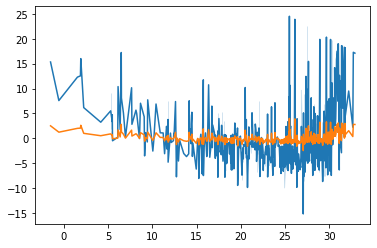

In [172]:
import statsmodels.api as sm

#create instance of influence
influence = results.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag

#Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external

sns.lineplot(results.predict(), results.resid)
sns.lineplot(results.predict(), studentized_residuals)

# 3.6.3 Multiple Linear Regression

In [179]:
Y = np.array(boston.target) # MEDV
X = np.array(bos)
X_train = sm.add_constant(X) # Our model needs an intercept so we add a column of 1s (statsmodel)

results = sm.OLS(Y, X_train).fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        06:28:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
x1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x2             0.0464      0.014      3.382      0.001       0.019       0.073
x3             0.0206      0.061      0.334      0.738      -0.100       0.141
x4             2.6867      0.862      3.118      0.002       0.994       4.380
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

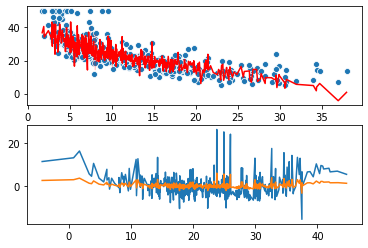

In [188]:
fig, ax = plt.subplots(2,1)

# X1 Prediction
X_flat = X = np.array(bos.LSTAT).flatten()
sns.scatterplot(X_flat, Y, ax=ax[0])
sns.lineplot(X_flat, results.predict(), color='red', ax=ax[0])

# Residuals
influence = results.get_influence()
standardized_residuals = influence.resid_studentized_internal
studentized_residuals = influence.resid_studentized_external

sns.lineplot(results.predict(), results.resid, ax=ax[1])
sns.lineplot(results.predict(), studentized_residuals, ax=ax[1])

# 3.6.4 Interaction Terms

In [192]:
x14 = bos.LSTAT * bos.AGE
bos["statusAge"] = x14

Y = np.array(boston.target) # MEDV
X = np.array(bos)
X_train = sm.add_constant(X) # Our model needs an intercept so we add a column of 1s (statsmodel)

results = sm.OLS(Y, X_train).fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     100.3
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          5.18e-134
Time:                        07:04:11   Log-Likelihood:                -1498.5
No. Observations:                 506   AIC:                             3027.
Df Residuals:                     491   BIC:                             3090.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0344      5.468      6.956      0.000      27.291      48.778
x1            -0.1117      0.033     -3.365      0.001      -0.177      -0.046
x2             0.0431      0.014      3.007      0.003       0.015       0.071
x3             0.0189      0.062      0.308      0.758      -0.102       0.140
x4             2.7096      0.862      3.142      0.002       1.015       4.404
x5           -18.0266      3.835     -4.701      0.000     -25.561     -10.492
x6             3.7594      0.423      8.893      0.000       2.929       4.590
x7            -0.0103      0.019     -0.542      0.588      -0.048       0.027
x8            -1.4753      0.200     -7.394      0.000      -1.867      -1.083
x9             0.3077      0.066      4.634      0.000       0.177       0.438
x10           -0.0123      0.004     -3.279      0.001      -0.020      -0.005
x11           -0.9582      0.131     -7.312      0.000      -1.216      -0.701
x12            0.0092      0.003      3.414      0.001       0.004       0.014
x13           -0.6357      0.147     -4.326      0.000      -0.924      -0.347
x14            0.0013      0.002      0.804      0.422      -0.002       0.004
==============================================================================
Omnibus:                      179.945   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              800.743
Skew:                           1.535   Prob(JB):                    1.32e-174
Kurtosis:                       8.344   Cond. No.                     3.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.6.6 Qualitative Predictors

In [195]:
carseats = pd.read_csv("../data/bookSets/Carseats.csv") 
carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [196]:
carseats.target

AttributeError: 'DataFrame' object has no attribute 'target'